In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "onU0Q8ycGli3zQ4odIvXqxsv6"
consumer_secret = "6RJ27SZQycSC1cTXySoYD3dvWTDz1k28rlgY47nDTrFsCD0MCw"
access_token = "948782946869166085-vwBcdh9wspiLQkDaQaeQ4oZSLxBMZ48"
access_token_secret = "xA1cAcAZhAGOmREWV3qnsyAkyBBaKZvvAZ5yt4uETp9ZD"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# User Twitter Accounts
users = ["@BBC", "@CNN", "@FOXNEWS", "@NYTIMES","@CBS"]

# Variables for holding sentiments
sources = []
texts = []
dates = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []


for user in users :
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

          # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            dates.append(tweet["created_at"])
            sources.append(user)
            texts.append(tweet["text"])
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)

public_tweets = api.user_timeline(user, page=5)
tweet = public_tweets[0]
compound = analyzer.polarity_scores(tweet["text"])["compound"]
pos = analyzer.polarity_scores(tweet["text"])["pos"]
neu = analyzer.polarity_scores(tweet["text"])["neu"]
neg = analyzer.polarity_scores(tweet["text"])["neg"]


# Add each value to the appropriate list
dates.append(tweet["created_at"])
sources.append("@CBS")
texts.append(tweet["text"])
compound_list.append(compound)
positive_list.append(pos)
negative_list.append(neg)
neutral_list.append(neu)
            
            
# Print the Averages
print("")
print("User: %s" % user)
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")
 
print(compound_list)


# print(json.dumps(tweet, sort_keys=True, indent=4, separators=(',', ': ')))


User: @CBS
Compound: 0.0543582
Positive: 0.089508
Neutral: 0.8392860000000001
Negative: 0.07119800000000001
[0.2263, 0.7351, 0.0, 0.0, 0.0, -0.1531, 0.3612, 0.0, 0.6369, 0.4215, 0.128, -0.0258, 0.5859, 0.6369, 0.0, 0.4019, 0.0, 0.0, 0.0, 0.0, 0.2263, 0.7351, 0.0, 0.0, 0.0, -0.1531, 0.3612, 0.0, 0.6369, 0.4215, 0.128, -0.0258, 0.5859, 0.6369, 0.0, 0.4019, 0.0, 0.0, 0.0, 0.0, -0.0772, 0.4019, -0.3182, 0.0, 0.6597, 0.0, 0.6369, -0.1531, 0.5267, -0.5423, -0.5204, -0.4588, 0.0, 0.0, 0.4588, 0.0, 0.1531, -0.5994, 0.0, 0.0, 0.5719, 0.0, 0.0, -0.4215, 0.0, -0.4588, -0.4939, 0.0, 0.5859, -0.4939, 0.0, 0.0, 0.3612, 0.5859, 0.4118, 0.3612, 0.0, 0.0, -0.7269, -0.2006, -0.6486, 0.4588, 0.0, -0.7901, 0.3612, 0.6369, -0.6597, 0.0, 0.8176, 0.7096, 0.4588, -0.3182, 0.0, -0.7088, -0.1007, 0.6124, 0.34, 0.3612, 0.0, 0.5994, 0.4404, 0.765, 0.3182, -0.34, 0.0, 0.0, 0.0, 0.0, 0.296, 0.0, 0.25, -0.34, -0.7269, -0.34, -0.4019, 0.0, 0.34, -0.7845, 0.0, 0.0, 0.4404, 0.765, 0.3182, -0.34, 0.0, 0.0, 0.0, 0.0, 0.

In [4]:
newstweets = pd.DataFrame({"text": texts, "compound": compound_list, "neutral": neutral_list, "positive": positive_list, "negative": negative_list, "user" : sources, "date" : dates})
newstweets.to_csv("newstweets.csv")
newstweets

,compound,date,negative,neutral,positive,text,user
0,0.2263,Sun Jan 07 20:03:03 +0000 2018,0.107,0.734,0.158,Switzerland's Schindler? \nCarl Lutz is the fo...,@BBC
1,0.7351,Sun Jan 07 19:30:04 +0000 2018,0.000,0.721,0.279,"Tonight, Michael Palin shares the story behind...",@BBC
2,0.0000,Sun Jan 07 19:25:10 +0000 2018,0.000,1.000,0.000,RT @BBCWorld: Snowing or glowing? https://t.co...,@BBC
3,0.0000,Sun Jan 07 19:22:48 +0000 2018,0.000,1.000,0.000,RT @BBCRadio4: 🎪 Roll up! Roll up!\nhttps://t....,@BBC
4,0.0000,Sun Jan 07 19:19:39 +0000 2018,0.000,1.000,0.000,RT @bbccomedy: We can't keep up with the Karcr...,@BBC
5,-0.1531,Sun Jan 07 19:18:56 +0000 2018,0.074,0.926,0.000,RT @bbcmusic: Ed Sheeran performing 'Perfect' ...,@BBC
6,0.3612,Sun Jan 07 19:00:05 +0000 2018,0.000,0.898,0.102,You can learn what an animal sounds like from ...,@BBC
7,0.0000,Sun Jan 07 18:32:03 +0000 2018,0.000,1.000,0.000,"Tonight, David Attenborough attempts to animat...",@BBC
8,0.6369,Sun Jan 07 17:59:05 +0000 2018,0.000,0.682,0.318,Budget Italian feasts the whole family will lo...,@BBC
9,0.4215,Sun Jan 07 17:19:01 +0000 2018,0.000,0.797,0.203,What's the true scale of the global trade in h...,@BBC


In [5]:
count = 0
for source in sources:
    if source == "@CBS" :
        count +=1
print(count)

100


In [6]:
users = ["@BBC", "@CNN", "@FOXNEWS", "@NYTIMES","@CBS"]
newsgroup = newstweets.groupby("user")
newscomparison = newsgroup.mean()
newscomparison

,compound,negative,neutral,positive
user,,,,
@BBC,0.102894,0.05963,0.84526,0.09507
@CBS,0.343236,0.02354,0.81357,0.16291
@CNN,-0.031030,0.07465,0.86269,0.06266
@FOXNEWS,-0.100285,0.11231,0.82821,0.05950
@NYTIMES,-0.043024,0.08586,0.84670,0.06740


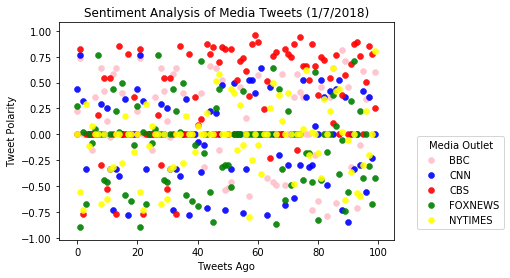

In [16]:
# Scatterplot of 100 tweets of each media outlet
import matplotlib.pyplot as plt

plt.scatter(range(100), newstweets[newstweets['user'] == '@BBC']['compound'], c='pink', alpha=0.9, linewidth=.5, label='BBC')
plt.scatter(range(100), newstweets[newstweets['user'] == '@CNN']['compound'], c='blue', alpha=0.9, linewidth=.5, label='CNN')
plt.scatter(range(100), newstweets[newstweets['user'] == '@CBS']['compound'], c='red', alpha=0.9, linewidth=.5, label='CBS')
plt.scatter(range(100), newstweets[newstweets['user'] == '@FOXNEWS']['compound'], c='green', alpha=0.9, linewidth=.5, label='FOXNEWS')
plt.scatter(range(100), newstweets[newstweets['user'] == '@NYTIMES']['compound'], c='yellow', alpha=0.9, linewidth=.5, label='NYTIMES')
plt.title("Sentiment Analysis of Media Tweets (1/7/2018)")
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.legend(title="Media Outlet", loc='upper center', bbox_to_anchor=(1.2, 0.5))
plt.savefig('sentimentanalysis.png')
plt.show()

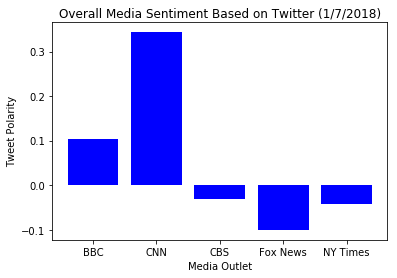

In [18]:
# Overall Media Sentiment Bar Graph
mediaoutlets = ["BBC", "CNN", "CBS", "Fox News", "NY Times"]
tweetpolarity = [0.102894, 0.343236, -0.031030, -0.100285, -0.043024]
x_axis = np.arange(len(tweetpolarity))

# Create a bar chart based upon the above data
plt.bar(x_axis, tweetpolarity, color="b", align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, mediaoutlets)

# Give the chart a title, x label, and y label
plt.title("Overall Media Sentiment Based on Twitter (1/7/2018)")
plt.xlabel("Media Outlet")
plt.ylabel("Tweet Polarity")

# Save an image of the chart and print it to the screen
plt.savefig("overallsentiment.png")
plt.show()